# Análise dos Microdados Enem 2022

In [1]:
import pandas as pd
import chardet
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importando Dados

In [2]:
dados = pd.read_csv('data/MICRODADOS_ENEM_2022.csv', encoding='cp1252', sep=';')

In [3]:
dados.head(4)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B


#### Quantidade Total de participantes, Total Feminino e Total Masculino 

In [4]:
masc = dados['TP_SEXO'] == 'M'
fem = dados['TP_SEXO'] == 'F'
m = dados[masc].shape[0]
f = dados[fem].shape[0]

In [5]:
f

2120519

In [6]:
m

1355586

In [7]:
f + m == dados.shape[0]

True

#### Separando em um DF as colunas de Sexo e Notas por área do conhecimento

In [8]:
df_sexo_notas = dados.loc[:, ['TP_SEXO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

#### Removendo os dados NA

In [9]:
df_sexo_notas = df_sexo_notas.dropna()
df_sexo_notas.head(15)

,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
2,F,421.1,546.0,498.8,565.3
3,M,490.7,388.6,357.8,416.0
7,F,398.1,427.3,400.2,404.9
9,F,467.5,461.0,466.7,435.3
11,F,458.7,539.8,488.2,456.8
17,F,396.8,528.7,551.4,536.0
18,F,481.4,603.6,589.0,695.0
20,F,466.5,476.2,488.3,462.7
22,F,493.8,498.2,527.0,343.0
23,M,476.0,559.2,607.3,625.4


### Total de Faltantes

In [10]:
total_faltantes = dados.shape[0] - df_sexo_notas.shape[0]
total_faltantes

1131282

#### Faltantes em Porcentagem

In [11]:
total_faltantes_porcentagem = (total_faltantes / dados.shape[0]) * 100
total_faltantes_porcentagem

32.544529005884456

##### Média notas separadas por sexo

In [12]:
media_por_area_sexo = df_sexo_notas.groupby('TP_SEXO').mean()
media_por_area_sexo

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
TP_SEXO,,,,
F,488.478663,525.790145,519.092356,526.702268
M,507.941966,536.578920,521.117842,567.778466


In [32]:
#Transformar o TP_SEXO em um coluna:
media_por_area_sexo = media_por_area_sexo.reset_index()
media_por_area_sexo

,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,F,488.478663,525.790145,519.092356,526.702268
1,M,507.941966,536.578920,521.117842,567.778466


### Fazendo o gráfico

In [37]:
# Transforma o DataFrame para ter uma coluna de Matérias com todas as área do conhecimento
df_melted = media_por_area_sexo.melt(id_vars='TP_SEXO', var_name='Matéria', value_name='Média')

In [56]:
# Define as novas labels para as matérias no gráfico:
materias_labels = {
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática'
}

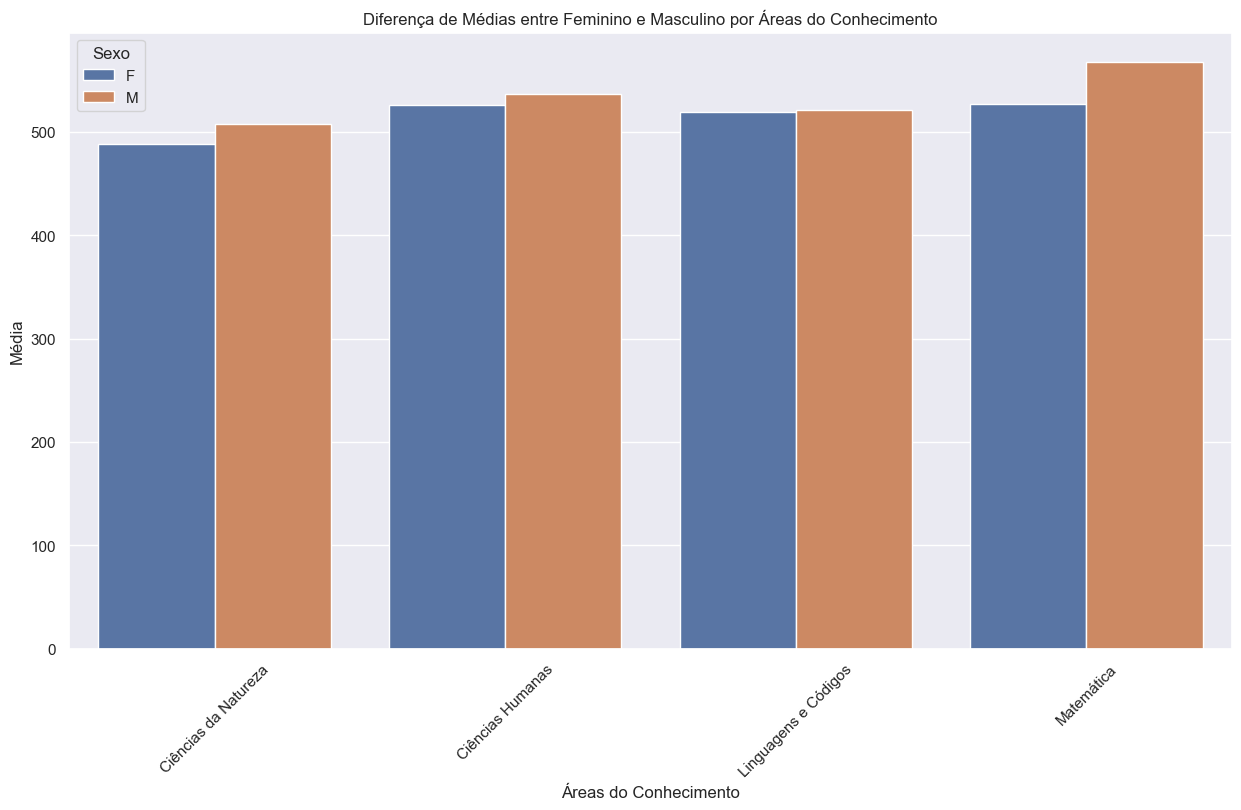

In [57]:
# Cria o gráfico de barras AGRUPADO
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Matéria', y='Média', hue='TP_SEXO', data=df_melted)
plt.xlabel('Áreas do Conhecimento')
plt.ylabel('Média')
plt.title('Diferença de Médias entre Feminino e Masculino por Áreas do Conhecimento')
ax.set_xticklabels([materias_labels[materia.get_text()] for materia in ax.get_xticklabels()], rotation=45)
plt.legend(title='Sexo')
plt.show()

##### Diferença das Médias em Ciências da Natureza

In [64]:
diferenca_media_cn = media_por_area_sexo.loc[media_por_area_sexo['TP_SEXO'] == "M", "NU_NOTA_CN"].values[0] - media_por_area_sexo.loc[media_por_area_sexo['TP_SEXO'] == "F", "NU_NOTA_CN"].values[0]
diferenca_media_cn

19.463302376968045

##### Diferença das Médias em Ciências Humanas

In [68]:
diferenca_media_ch = media_por_area_sexo.loc[media_por_area_sexo['TP_SEXO'] == "M", "NU_NOTA_CH"].values[0] - media_por_area_sexo.loc[media_por_area_sexo['TP_SEXO'] == "F", "NU_NOTA_CH"].values[0]
diferenca_media_ch

10.788774836398716

##### Diferença das Médias em Linguagens e Códigos

In [69]:
diferenca_media_lc = media_por_area_sexo.loc[media_por_area_sexo['TP_SEXO'] == "M", "NU_NOTA_LC"].values[0] - media_por_area_sexo.loc[media_por_area_sexo['TP_SEXO'] == "F", "NU_NOTA_LC"].values[0]
diferenca_media_lc

2.0254858482658165

##### Diferença das Médias em Matemática

In [70]:
diferenca_media_mt = media_por_area_sexo.loc[media_por_area_sexo['TP_SEXO'] == "M", "NU_NOTA_MT"].values[0] - media_por_area_sexo.loc[media_por_area_sexo['TP_SEXO'] == "F", "NU_NOTA_MT"].values[0]
diferenca_media_mt

41.07619737625862

#### Gráfico das Diferenças

In [81]:
areas_conhecimento = ['Linguagens e Códigos','Ciências Humanas','Ciências da Natureza','Matemática']
diferencas = sorted([diferenca_media_cn, diferenca_media_ch, diferenca_media_lc, diferenca_media_mt])

Text(0.5, 1.0, ' ')

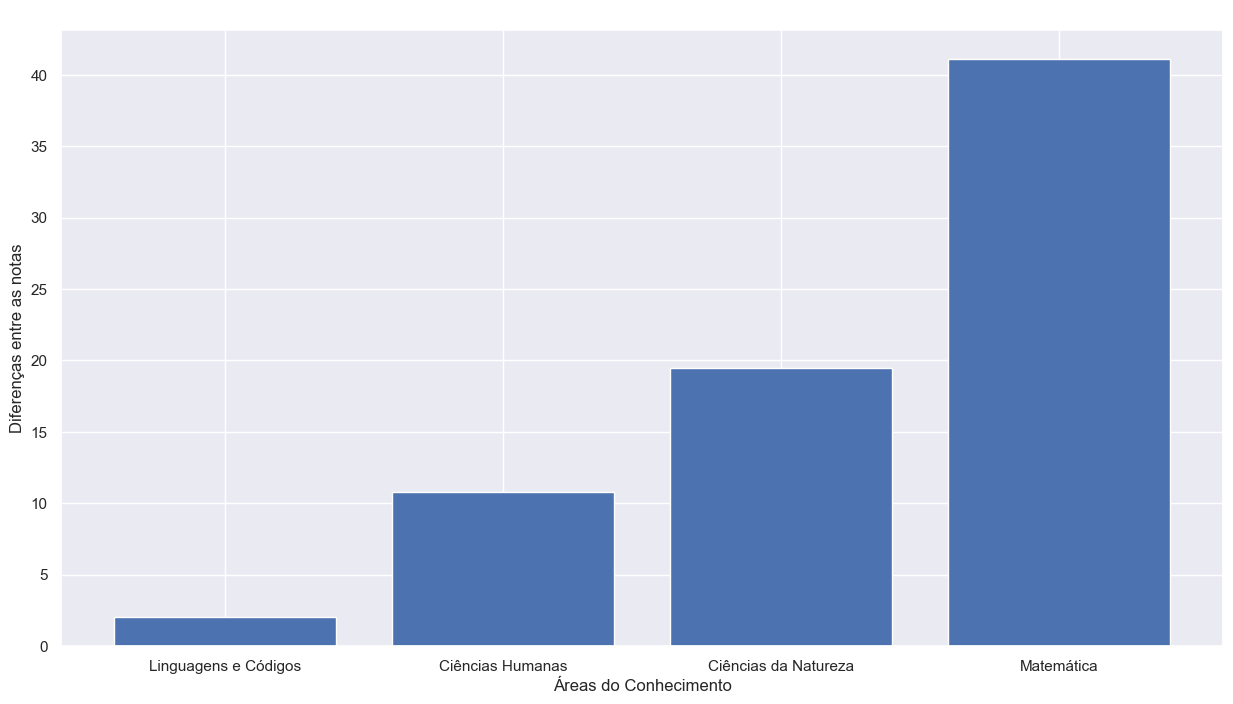

In [82]:
plt.figure(figsize=(15,8))
plt.bar(areas_conhecimento, diferencas)
plt.xlabel("Áreas do Conhecimento")
plt.ylabel("Diferenças entre as notas")
plt.title(" ")

masc = df_sexo_notas['TP_SEXO'] == 'M'
fem = df_sexo_notas['TP_SEXO'] == 'F'
male = df_sexo_notas[masc].shape[0]
female = df_sexo_notas[fem].shape[0]
male
female